In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from visualize import plot_hist, AUROC
import config

# Setting_VAE_NLL

In [116]:
array_path = './npy/VAE_NLL_npy'

model = 'VAE'
#opt = config.VAE_cifar10
opt = config.VAE_fmnist

if opt.train_dist == 'cifar10':
    min_x = 6000
    max_x = 15000
elif opt.train_dist == 'fmnist':
    min_x = 0
    max_x = 5000

# Setting_GLOW_NLL

In [3]:
array_path = './npy/GLOW_NLL_npy'

model = 'GLOW'
#opt = config.GLOW_cifar10
opt = config.GLOW_fmnist

normalize_factor = 1 / 1024
if opt.train_dist == 'cifar10':
    min_x = 1
    max_x = 6
    multiplier = 3
elif opt.train_dist == 'fmnist':
    min_x = 0
    max_x = 5
    multiplier = 1

# Plot NLL Histogram & Save the figure

In [59]:
auroc

{'fmnist': 0.5,
 'svhn': 0.90312058,
 'celeba': 0.9981326199999999,
 'lsun': 0.99819708,
 'cifar10': 0.996294,
 'cifar100': 0.9954284,
 'mnist': 0.16436753999999998,
 'kmnist': 0.56464488,
 'omniglot': 0.98686764,
 'notmnist': 0.7661330799999999,
 'noise': 0.99999876,
 'constant': 0.25689266}

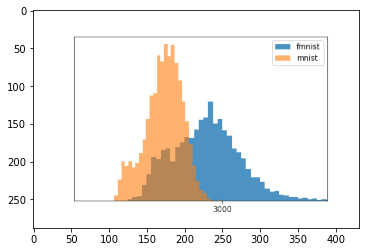

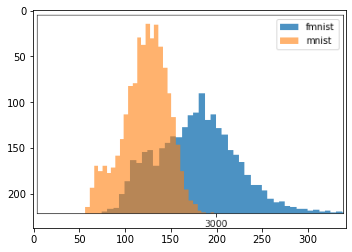

In [8]:
from PIL import Image
path = './images/histogram/selected images/Histogram_fmnist_mnist_NLL_GLOW.png'
img = Image.open(path)
w = 40
h = 20
cropped_img = img.crop((w+10, h+10, 432-w, 288-h))

plt.figure()
plt.imshow(img)
plt.show()
plt.figure()
plt.imshow(cropped_img)
plt.show()

img = cropped_img
img.save(path)

In [6]:
a = np.load(f'{array_path}/{opt.train_dist}_mnist_nll.npy')
a.max()

560.8617553710938

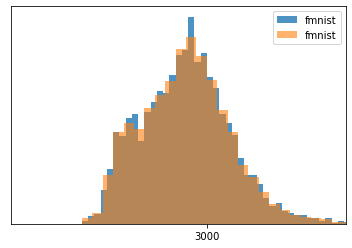

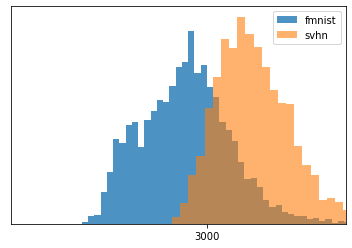

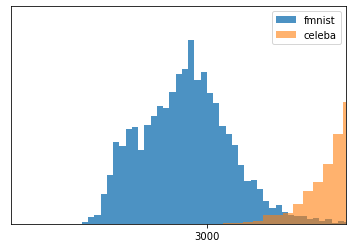

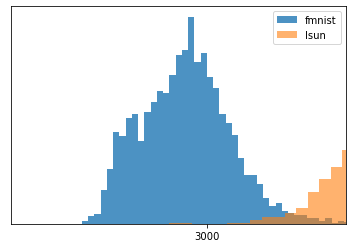

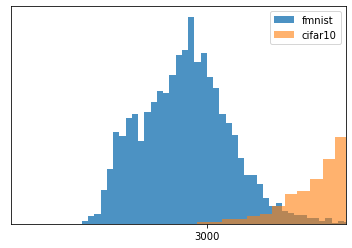

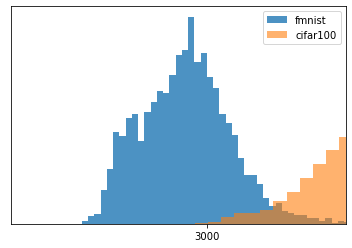

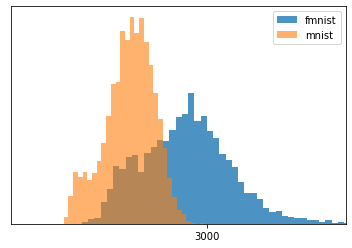

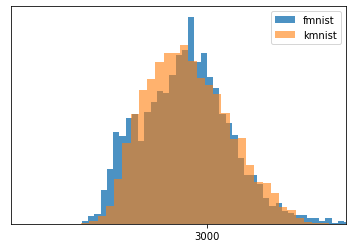

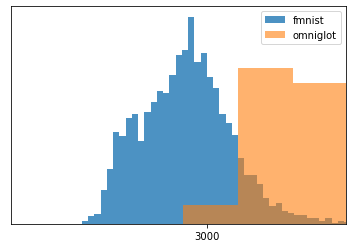

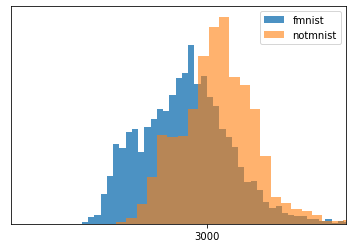

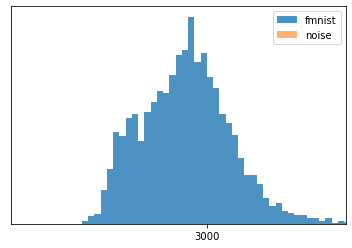

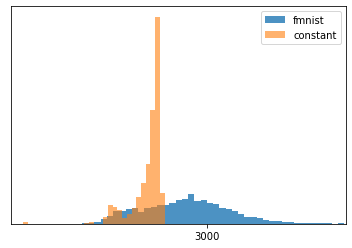

In [7]:
auroc = {}
in_nll = np.load(f'{array_path}/{opt.train_dist}_{opt.train_dist}_nll.npy' )
in_nll *= multiplier
for ood in opt.ood_list:
    out_nll = np.load(f'{array_path}/{opt.train_dist}_{ood}_nll.npy')
    out_nll *= multiplier
    if opt.train_dist == 'fmnist' and ood == 'mnist':
        out_nll[out_nll > 100] = 2
    try:
        auroc[ood] = AUROC(in_nll, out_nll, labels=[opt.train_dist, ood], verbose=False)
    except ValueError:
        out_nll[out_nll == np.inf] = 1e+30
        auroc[ood] = AUROC(in_nll, out_nll, labels=[opt.train_dist, ood], verbose=False)
    
    fig = plt.figure(figsize=(6, 4))
    plt.hist(in_nll / normalize_factor, bins=50, density=True, alpha=0.8, label=opt.train_dist)
    plt.hist(out_nll / normalize_factor, bins=30, density=True, alpha=0.6, label=ood)
    
    plt.xlim(min_x * multiplier / normalize_factor, max_x * multiplier / normalize_factor)
    A = min_x * multiplier / normalize_factor // 1000 * 1000
    B = max_x * multiplier / normalize_factor // 1000 * 1000
    plt.xticks(np.arange(A, B, 3000)[1:])
    plt.yticks([])
    plt.legend(prop={'size': 10})
    fig.savefig(f'./images/histogram/Histogram_{opt.train_dist}_{ood}_NLL_{model}.png')
    
    plt.show()
    
    
    